# Anomaly detecion

(307, 2)


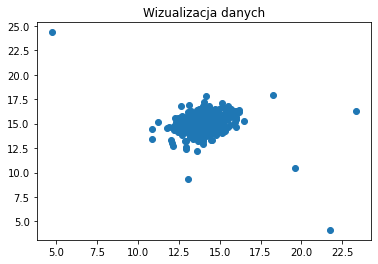

In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from scipy.io import loadmat  
 
 
data = loadmat('ex8data1.mat')  
X = data['X']

print(X.shape)

plt.title("Wizualizacja danych")
plt.scatter(X[:, 0], X[:, 1])
plt.show()

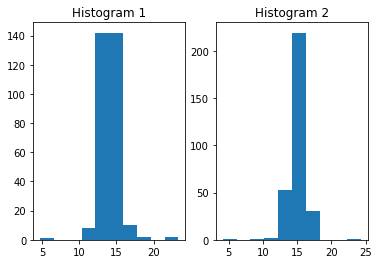

In [2]:
fig, ax = plt.subplots(1, 2)
ax[0].hist(X[:,0])
ax[0].set_title('Histogram 1')
ax[1].hist(X[:,1])
ax[1].set_title('Histogram 2')
plt.show()

# Gaussian distribution

In [3]:
import numpy as np

def estimate_gaussian(X):
    
    mu = [np.mean(X[:,0]), np.mean(X[:,1])]
    sigma = [np.std(X[:,0]), np.std(X[:,1])]
    
    return mu, sigma

print(estimate_gaussian(X))

([14.112225783945592, 14.99771050813621], [1.353747174879607, 1.3075723042450764])


# Calculate probability

In [4]:
Xval = data['Xval']  
yval = data['yval']

print(Xval.shape, yval.shape)

(307, 2) (307, 1)


In [5]:
from scipy import stats
from scipy.stats import norm

mean_X, sig_X = estimate_gaussian(X[:50])

pdf_norm_X0 = stats.norm.pdf(X[:, 0], loc=mean_X[0], scale=np.sqrt(sig_X[0]))
pdf_norm_X1 = stats.norm.pdf(X[:, 1], loc=mean_X[1], scale=np.sqrt(sig_X[1]))
print(pdf_norm_X0)
print(pdf_norm_X1)


[2.04643999e-01 2.97414507e-01 4.13140604e-01 3.12083967e-01
 3.37366058e-01 3.97419548e-01 1.51167900e-01 1.26641377e-01
 5.14000954e-02 1.18720874e-01 4.03772424e-01 4.09420478e-01
 2.92743082e-01 2.93652903e-01 4.03269786e-01 4.13022726e-01
 4.01624357e-01 3.97583297e-01 3.80250851e-01 3.73462159e-02
 3.31154460e-01 4.03924184e-01 2.98510187e-01 4.12228708e-01
 2.05087864e-01 1.35130984e-01 3.46959273e-01 3.35276513e-01
 3.78887207e-01 3.93976103e-01 1.58729610e-01 4.02904443e-01
 1.81680932e-01 1.66104618e-01 6.85297566e-02 3.09268038e-01
 8.36502400e-02 4.10628041e-01 3.87490822e-01 4.12930965e-01
 3.90030464e-01 2.23164576e-01 3.91141361e-01 4.13127965e-01
 3.56359934e-01 3.85872295e-01 7.14007932e-02 4.12227615e-01
 3.87509380e-01 1.85293234e-01 2.57575530e-01 3.56778618e-01
 3.76519493e-01 4.12193031e-01 3.86025470e-01 4.12811102e-01
 4.12212020e-01 4.12003581e-01 3.44560892e-01 4.13071035e-01
 2.59628133e-01 4.12312956e-01 1.73933366e-01 3.88455971e-01
 4.02288224e-01 2.574024

In [6]:
pval = np.zeros((Xval.shape[0], Xval.shape[1]))
pval[:,0] = stats.norm.pdf(Xval[:,0], loc=mean_X[0], scale=np.sqrt(sig_X[0]))
pval[:,1] = stats.norm.pdf(Xval[:,1], loc=mean_X[1], scale=np.sqrt(sig_X[1]))

print(pval[:10])

[[0.10490135 0.41463537]
 [0.3509087  0.40172342]
 [0.32371078 0.1381886 ]
 [0.33913323 0.22392016]
 [0.31109284 0.34791604]
 [0.18053408 0.218984  ]
 [0.21099519 0.41549061]
 [0.39449951 0.3873267 ]
 [0.02603749 0.30730834]
 [0.32524261 0.41329401]]


# Selecting the threshold

In [7]:
from sklearn.metrics import f1_score

def select_threshold(pval, yval):
    best_f1 = 0
    best_epsilon = 0
    for tres in np.linspace(pval.min(), pval.max(), 10000).tolist():
        t = pval <= tres
        y = np.logical_or(t[:,0],t[:,1])
        f1 = f1_score(yval, y)
        
        if f1 > best_f1:
            best_f1 = f1
            best_epsilon = tres
    
    return best_epsilon, best_f1

In [8]:
best_epsilon, best_f1 = select_threshold(pval, yval)
print(best_epsilon, best_f1)

4.1881466182579337e-05 0.8750000000000001


# Anomaly detecion result

In [9]:
t0 = pdf_norm_X0 < best_epsilon
t1 = pdf_norm_X1 < best_epsilon
y = np.logical_or(t0,t1).astype(int)
anomalies = np.where(y == 1)
print(anomalies)

(array([300, 301, 303, 304, 306], dtype=int64),)


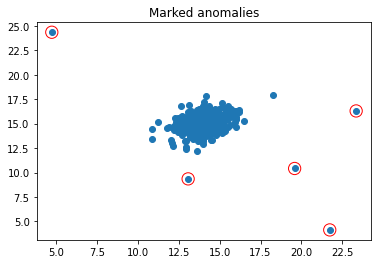

In [10]:
anomalies_plot = np.zeros((anomalies[0].shape[0], 2))
for i in range (0, anomalies[0].shape[0]):
    anomalies_plot[i, 0] = X[anomalies[0][i], 0]
    anomalies_plot[i, 1] = X[anomalies[0][i], 1]
    
plt.scatter(X[:,0], X[:,1])
plt.scatter(anomalies_plot[:,0], anomalies_plot[:,1], s=150, facecolors='none', edgecolors='r')
plt.title('Marked anomalies')
plt.show()